### Overview

Neural networks are powerful machine learning models inspired by how neurons work in the brain. They learn to recognize patterns by adjusting internal parameters (weights and biases).

**Key Concepts:**

- Neurons: mathematical functions that transform inputs
- Layers: groups of neurons (input, hidden, output)
- Activation functions: non-linear transformations (sigmoid, ReLU)
- Training: optimizing weights/biases to minimize prediction error

### How Neurons Work

A neuron calculates a linear function then applies activation.  Suppose there are 64 input variables $x_1, \ldots, x_{64}$ to a neuron.  Then:

**Linear Calculation:** $z = b + w_1  x_1 + w_2  x_2 + ... + w_{64} x_{64}$

- $b =$ bias (intercept)
- $w_1, w_2, \ldots, w_{64} = $ weights 

**Activation Functions (for hidden layers - choose one):**

- ReLU: $h = \max(0, z)$ outputs values $\ge 0$ 
- Sigmoid: $h = \frac{1}{1 + e^{-z}}$ outputs values between 0 and 1

The parameters (biases and weights) are learned from data during training.

### Visualizing Activation Functions

Let's compare the two common activation functions used in neural networks:

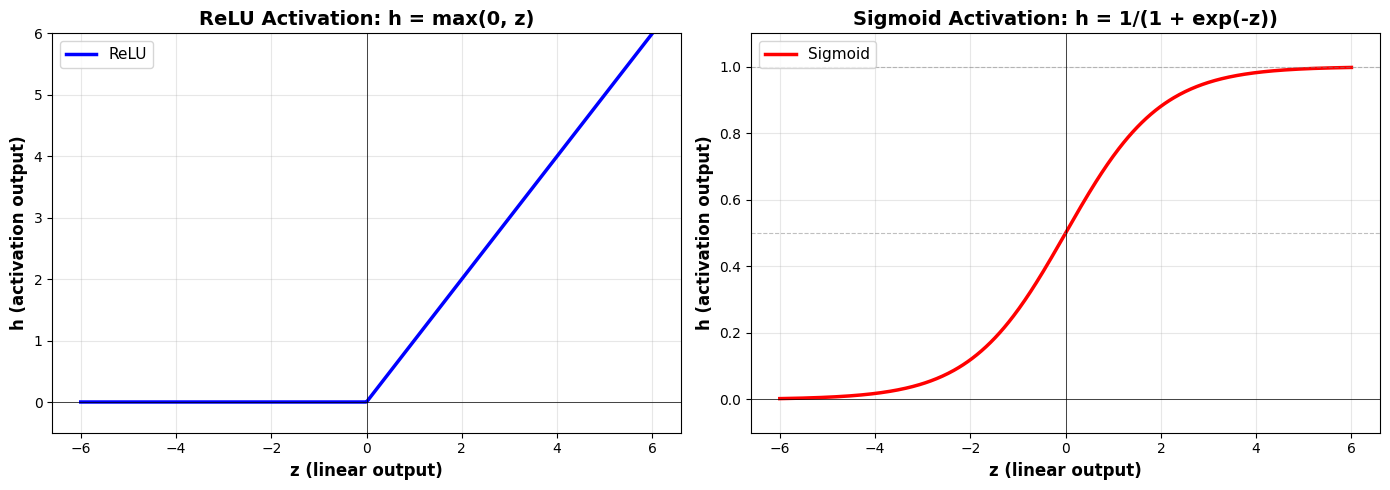

Key Properties:

ReLU (Rectified Linear Unit):
  - Output range: [0, ∞)
  - For z < 0: outputs 0 (neuron is 'off')
  - For z ≥ 0: outputs z (neuron is 'on')
  - Simple and computationally efficient
  - Most popular for hidden layers

Sigmoid:
  - Output range: (0, 1)
  - Smoothly transforms any input to a value between 0 and 1
  - When z = 0: output = 0.5
  - Saturates for very large or very small z
  - Often used for output layers in binary classification


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for z (input to activation function)
z = np.linspace(-6, 6, 500)

# Define activation functions
relu = np.maximum(0, z)
sigmoid = 1 / (1 + np.exp(-z))

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot ReLU
axes[0].plot(z, relu, 'b-', linewidth=2.5, label='ReLU')
axes[0].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[0].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('z (linear output)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('h (activation output)', fontsize=12, fontweight='bold')
axes[0].set_title('ReLU Activation: h = max(0, z)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].set_ylim(-0.5, 6)

# Plot Sigmoid
axes[1].plot(z, sigmoid, 'r-', linewidth=2.5, label='Sigmoid')
axes[1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1].axhline(y=0.5, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
axes[1].axhline(y=1, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
axes[1].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('z (linear output)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('h (activation output)', fontsize=12, fontweight='bold')
axes[1].set_title('Sigmoid Activation: h = 1/(1 + exp(-z))', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].set_ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

# Print key properties
print("Key Properties:")
print("\nReLU (Rectified Linear Unit):")
print("  - Output range: [0, ∞)")
print("  - For z < 0: outputs 0 (neuron is 'off')")
print("  - For z ≥ 0: outputs z (neuron is 'on')")
print("  - Simple and computationally efficient")
print("  - Most popular for hidden layers")

print("\nSigmoid:")
print("  - Output range: (0, 1)")
print("  - Smoothly transforms any input to a value between 0 and 1")
print("  - When z = 0: output = 0.5")
print("  - Saturates for very large or very small z")
print("  - Often used for output layers in binary classification")

### Multi-layer Perceptrons

* A multi-layer perceptron (MLP) consists of layers of neurons.
* The input layer doesn't do anything. It just represents the features being loaded into the model.
* Output layer is the last layer. 
* The layers between the input and output layers are called "hidden layers."

#### Illustration

![](Neural-Nets-Transparent.png)

- inputs $x_1, x_2, x_3, x_4$
- variables $y_1, \ldots, y_5$  are calculated in hidden layer
- output is calculated from $y_1, \ldots, y_5$

### Output Layer

The output layer of a neural network depends on the type of problem being solved. The hidden layers use activation functions like ReLU, but the output layer uses different approaches:

#### (i) Regression Problems

**Goal:** Predict a continuous numerical value (e.g., stock price, temperature, sales)

**Output Layer:**
- **Single neuron** (for single-value prediction)
- **No activation function** (linear output)
- Calculation: $\hat{y} = b + w_1h_1 + w_2h_2 + \cdots + w_nh_n$
  - where $h_1, \ldots, h_n$ are outputs from the last hidden layer
- **Output range:** $(-\infty, \infty)$ — any real number

**Example:** Predicting house prices, stock returns, or next month's revenue

---

#### (ii) Binary Classification

**Goal:** Classify into one of two classes (e.g., spam/not spam, positive/negative)

**Output Layer:**
- **Single neuron** 
- **Sigmoid activation:** $\hat{p} = \frac{1}{1 + e^{-z}}$ where $z = b + w_1h_1 + \cdots + w_nh_n$
- **Output range:** $(0, 1)$ — interpreted as probability of class 1
- **Decision rule:** Predict class 1 if $\hat{p} > 0.5$, otherwise predict class 0

**Example:** Fraud detection (fraud/legitimate), medical diagnosis (disease/healthy)

---

#### (iii) Multi-class Classification

**Goal:** Classify into one of multiple classes (e.g., digit 0-9, image categories)

**Output Layer:**
- **Multiple neurons** (one per class)
- **Softmax activation** converts raw scores to probabilities:

$$\hat{p}_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$$

where:
  - $z_i = b_i + w_{i1}h_1 + \cdots + w_{in}h_n$ for each class $i$
  - $K$ = number of classes
  - $\hat{p}_i$ = predicted probability for class $i$

- **Output:** $K$ probabilities that sum to 1.0
- **Decision rule:** Predict the class with highest probability: $\arg\max_i \hat{p}_i$

**Example:** Digit recognition (0-9), image classification (cat/dog/bird), sentiment analysis (positive/neutral/negative)

### Import libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

### Example Task: Digit Classification

Classify hand-written numbers (digits 0 through 9).

The original handwritten digits were pixelated into 64 pixels (8 x 8). Each observation consists of 65 numbers: the true digit and the darkness values of each of the 64 pixels. Darkness values range from 0 (white) to 16 (black).

### Load and Explore the Digits Dataset

In [12]:
# Load the digits dataset
digits = load_digits()
X = digits.data  # 8x8 images flattened to 64 features
y = digits.target  # Digit labels 0-9

print(f"Digits Dataset:")
print(f"  Total samples: {X.shape[0]:,}")
print(f"  Features per sample: {X.shape[1]} (8×8 pixels)")
print(f"  Classes: {len(np.unique(y))} (digits 0-9)")
print(f"  Feature range: [{X.min():.1f}, {X.max():.1f}]")

Digits Dataset:
  Total samples: 1,797
  Features per sample: 64 (8×8 pixels)
  Classes: 10 (digits 0-9)
  Feature range: [0.0, 16.0]


### Visualize Sample Digits

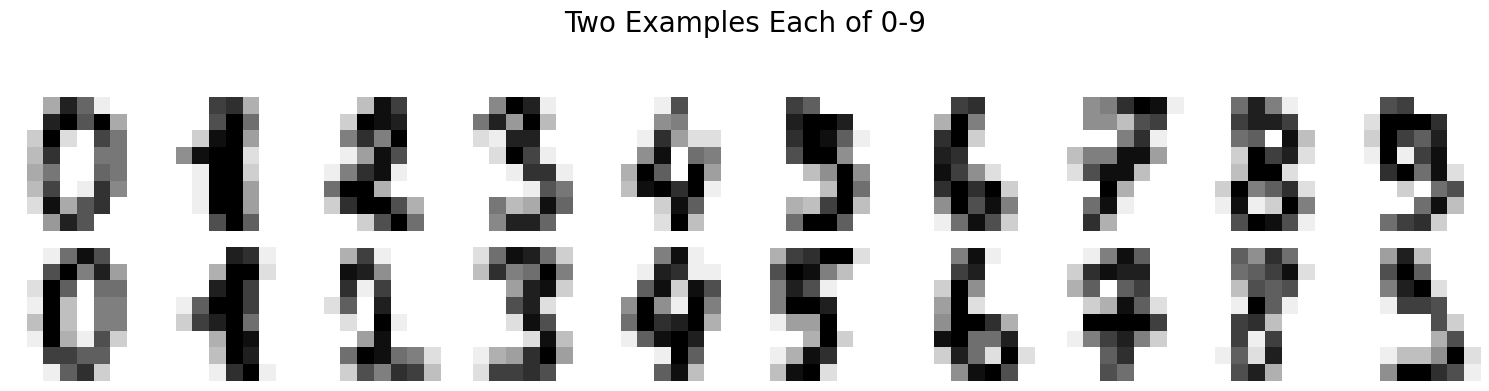

In [13]:
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for digit in range(10):
    idx = np.where(y == digit)[0][0]
    axes[0, digit].imshow(X[idx].reshape(8, 8), cmap='gray_r')
    axes[0, digit].axis('off')

    idx2 = np.where(y == digit)[0][1]
    axes[1, digit].imshow(X[idx2].reshape(8, 8), cmap='gray_r')
    axes[1, digit].axis('off')

plt.suptitle('Two Examples Each of 0-9', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

### Understanding Neural Networks with Digits

We'll explore how neural networks learn to classify handwritten digits. 

Each digit image has:
- 64 inputs (pixel values from 0-16)
- 10 possible outputs (digits 0-9)

A simple neural network with one hidden layer can learn the complex patterns that distinguish different digits.

### Prepare Data for Neural Network

In [14]:
# Normalize the pixel values to [0, 1] range
X_normalized = X / 16.0

# Split into training and test sets (80/20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Features: {X_train.shape[1]} (normalized pixel values)")
print(f"Classes: {len(np.unique(y))} digits (0-9)")

Training set: 1,437 samples
Test set: 360 samples
Features: 64 (normalized pixel values)
Classes: 10 digits (0-9)


### Train a Simple Neural Network

In [15]:
from sklearn.neural_network import MLPClassifier

# Create a neural network with one hidden layer of 50 neurons
nn_model = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    max_iter=500,
    random_state=42,
    verbose=False
)

# Train the model
nn_model.fit(X_train, y_train)

# Evaluate on both sets
train_accuracy = nn_model.score(X_train, y_train)
test_accuracy = nn_model.score(X_test, y_test)

print(f"Neural Network Performance:")
print(f"  Training accuracy: {train_accuracy:.2%}")
print(f"  Test accuracy: {test_accuracy:.2%}")
print(f"  Number of iterations: {nn_model.n_iter_}")
print(f"\nNetwork Architecture:")
print(f"  Input layer: 64 neurons (one per pixel)")
print(f"  Hidden layer: 50 neurons with ReLU activation")
print(f"  Output layer: 10 neurons (one per digit)")

Neural Network Performance:
  Training accuracy: 100.00%
  Test accuracy: 98.33%
  Number of iterations: 353

Network Architecture:
  Input layer: 64 neurons (one per pixel)
  Hidden layer: 50 neurons with ReLU activation
  Output layer: 10 neurons (one per digit)


**Parameters:**

- Hidden layer: 50 biases + 50×64 weights = 3,250 parameters
- Output layer: 10 biases + 10×50 weights = 510 parameters
- Total: 3,760 parameters to optimize

### Confusion Matrices

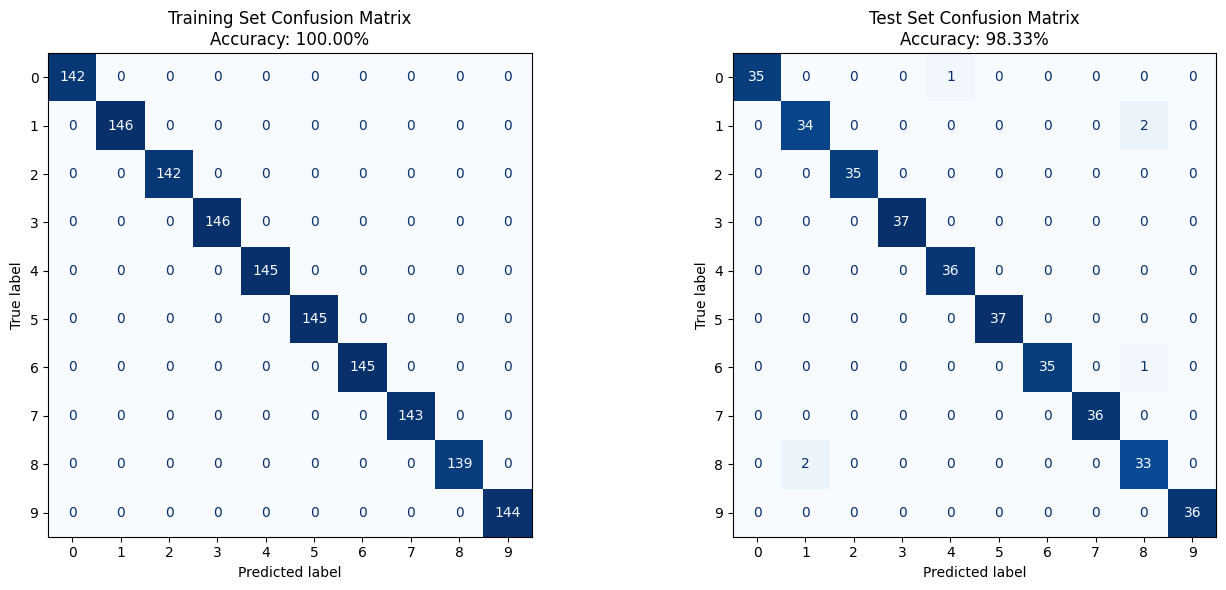

Classification errors by digit (Test Set):
  Digit 0: 97.2% accuracy
  Digit 1: 94.4% accuracy
  Digit 2: 100.0% accuracy
  Digit 3: 100.0% accuracy
  Digit 4: 100.0% accuracy
  Digit 5: 100.0% accuracy
  Digit 6: 97.2% accuracy
  Digit 7: 100.0% accuracy
  Digit 8: 94.3% accuracy
  Digit 9: 100.0% accuracy


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for both train and test sets
y_train_pred = nn_model.predict(X_train)
y_test_pred = nn_model.predict(X_test)

# Create confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training set confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=range(10))
disp_train.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title(f'Training Set Confusion Matrix\nAccuracy: {train_accuracy:.2%}', fontsize=12)

# Test set confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=range(10))
disp_test.plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title(f'Test Set Confusion Matrix\nAccuracy: {test_accuracy:.2%}', fontsize=12)

plt.tight_layout()
plt.show()

# Show some statistics
print("Classification errors by digit (Test Set):")
for digit in range(10):
    mask = y_test == digit
    digit_accuracy = (y_test_pred[mask] == digit).mean()
    print(f"  Digit {digit}: {digit_accuracy:.1%} accuracy")

### Network Complexity Analysis

We'll train multiple neural networks with increasing complexity and compare their performance on training and test data. This helps us understand:
- How model capacity affects performance
- Whether more complex models lead to overfitting
- The trade-off between training and test accuracy

In [18]:
# Define different network architectures (increasing complexity)
network_configs = [
    (10,),           # Small: 10 neurons
    (25,),           # Medium-small: 25 neurons
    (50,),           # Medium: 50 neurons
    (100,),          # Large: 100 neurons
    (25, 10),        # Two layers: 25 -> 10
    (50, 25),        # Two layers: 50 -> 25
    (100, 50),       # Two layers: 100 -> 50
    (50, 25, 10),    # Three layers: 50 -> 25 -> 10
    (100, 50, 25),   # Three layers: 100 -> 50 -> 25
]

# Store results
results = []
trained_models = {}

print("Training networks of increasing complexity...\n")

for i, config in enumerate(network_configs):
    # Create and train model
    model = MLPClassifier(
        hidden_layer_sizes=config,
        activation='relu',
        max_iter=500,
        random_state=42,
        verbose=False
    )
    
    model.fit(X_train, y_train)
    
    # Calculate accuracies
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    # Calculate number of parameters
    n_params = sum(w.size for w in model.coefs_) + sum(b.size for b in model.intercepts_)
    
    # Store results
    results.append({
        'config': config,
        'config_str': str(config),
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'n_params': n_params,
        'n_layers': len(config),
        'model_idx': i
    })
    
    trained_models[i] = model
    
    print(f"{i+1}. Architecture {config}:")
    print(f"   Parameters: {n_params:,}")
    print(f"   Train accuracy: {train_acc:.2%}")
    print(f"   Test accuracy: {test_acc:.2%}")
    print()

results_df = pd.DataFrame(results)
print("\nSummary:")
print(results_df[['config_str', 'n_params', 'train_accuracy', 'test_accuracy']].to_string(index=False))

Training networks of increasing complexity...

1. Architecture (10,):
   Parameters: 760
   Train accuracy: 99.79%
   Test accuracy: 96.94%

2. Architecture (25,):
   Parameters: 1,885
   Train accuracy: 100.00%
   Test accuracy: 97.50%

3. Architecture (50,):
   Parameters: 3,760
   Train accuracy: 100.00%
   Test accuracy: 98.33%

4. Architecture (100,):
   Parameters: 7,510
   Train accuracy: 100.00%
   Test accuracy: 98.06%

5. Architecture (25, 10):
   Parameters: 1,995
   Train accuracy: 100.00%
   Test accuracy: 97.50%

6. Architecture (50, 25):
   Parameters: 4,785
   Train accuracy: 100.00%
   Test accuracy: 96.67%

7. Architecture (100, 50):
   Parameters: 12,060
   Train accuracy: 100.00%
   Test accuracy: 98.06%

8. Architecture (50, 25, 10):
   Parameters: 4,895
   Train accuracy: 100.00%
   Test accuracy: 97.78%

9. Architecture (100, 50, 25):
   Parameters: 13,085
   Train accuracy: 100.00%
   Test accuracy: 97.78%


Summary:
   config_str  n_params  train_accuracy  test